In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print(Y_train[0])

[6]


In [ ]:
classes = ["Airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

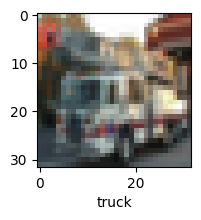

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index][0]])

plot_sample(X_train,Y_train,900)

In [ ]:
print(X_test[0])

[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print(X_test[0])

[[[0.61960784 0.43921569 0.19215686]
  [0.62352941 0.43529412 0.18431373]
  [0.64705882 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254902 0.14117647]
  [0.49411765 0.35686275 0.14117647]
  [0.45490196 0.33333333 0.12941176]]

 [[0.59607843 0.43921569 0.2       ]
  [0.59215686 0.43137255 0.15686275]
  [0.62352941 0.44705882 0.17647059]
  ...
  [0.53333333 0.37254902 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509804 0.13333333]]

 [[0.59215686 0.43137255 0.18431373]
  [0.59215686 0.42745098 0.12941176]
  [0.61960784 0.43529412 0.14117647]
  ...
  [0.54509804 0.38431373 0.13333333]
  [0.50980392 0.37254902 0.13333333]
  [0.47058824 0.34901961 0.12941176]]

 ...

 [[0.26666667 0.48627451 0.69411765]
  [0.16470588 0.39215686 0.58039216]
  [0.12156863 0.34509804 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254902]
  [0.05098039 0.25098039 0.42352941]
  [0.15686275 0.33333333 0.49803922]]

 [[0.23921569 0.45490196 0.65882353]
  [0.19215686 0.4        0.58039216]


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(96,activation="relu"),
    keras.layers.Dense(32,activation="softmax")
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2872 - loss: 1.9547
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5327 - loss: 1.2880
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6027 - loss: 1.1167
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6401 - loss: 1.0100
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6657 - loss: 0.9408
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6811 - loss: 0.8965
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7001 - loss: 0.8464
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7171 - loss: 0.7997
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7218 - loss: 0.7869
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7376 - loss: 0.7422


In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.76731553e-02, 4.62106988e-02, 1.77227636e-03, 7.24369407e-01,
        1.38258736e-03, 1.02208387e-02, 3.87510359e-02, 1.72490324e-03,
        1.01071514e-01, 5.68235554e-02, 1.29680893e-13, 6.63588596e-13,
        2.42146933e-13, 1.93478155e-12, 2.32093533e-13, 8.55536074e-14,
        1.42184224e-13, 4.72717975e-14, 5.85139196e-13, 2.83332165e-14,
        1.00709737e-13, 1.96290385e-13, 3.52339794e-13, 2.56627757e-14,
        2.45970507e-13, 3.72020631e-14, 6.02877801e-14, 4.75507729e-14,
        2.12289509e-13, 1.65633918e-13, 4.47500842e-13, 6.30321858e-13],
       [1.16821118e-01, 1.94656104e-01, 1.10616543e-06, 1.95830785e-06,
        1.11030545e-06, 8.08894374e-09, 1.26461444e-07, 1.06505684e-06,
        6.86345458e-01, 2.17194227e-03, 1.53955821e-21, 1.87964031e-21,
        1.40795743e-21, 4.94616747e-22, 5.78287601e-22, 2.22364647e-21,
        8.23877595e-22, 9.85014590e-22, 2.76058241e-21, 1.77611414e-22,
        9.51799835e-22, 1.88340140e-21, 2.77335444e-21, 4.86844

In [ ]:
y_t = Y_test.reshape(-1,)
y_t

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

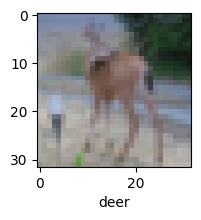

In [ ]:
plot_sample(X_test,Y_test,100)